In [98]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

### Reading the images in batches


In [99]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [100]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../Dataset/Potato/",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)


Found 2152 files belonging to 3 classes.


In [101]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [102]:
len(dataset), 68 * 32


(68, 2176)

There are 68 batches with 32 images in each batch except the last one


In [103]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 2 0 0 1 1 1 1 0]


# Visualizing the Image


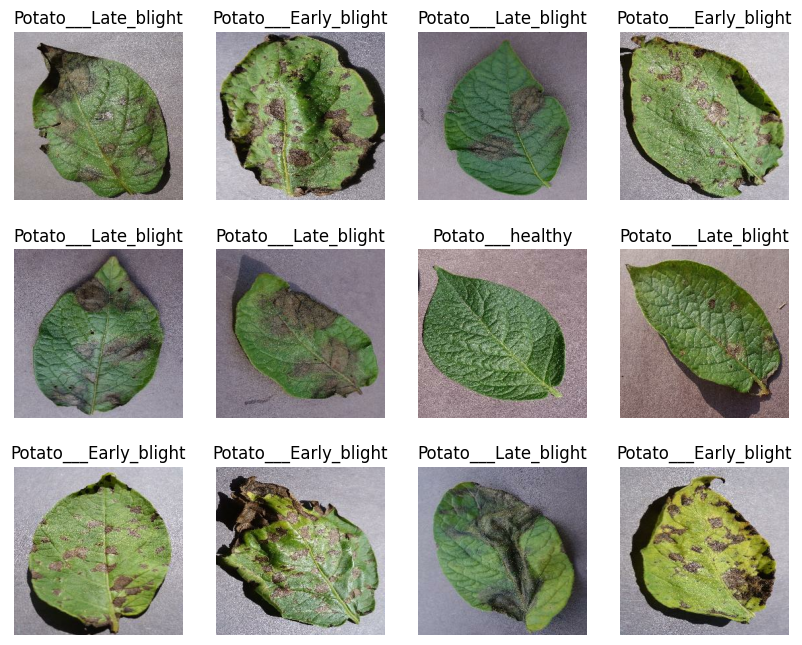

In [104]:
for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(10, 8))
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("int64"))
        plt.axis("off")
        plt.title(f"{class_names[label_batch[i]]}")

# RUN AGAIN AND AGAIN FOR SHUFFLE


## Splitting into train test and validation

Train : 80% </br>
Test : 10% </br>
Validation : 10% </br>


In [105]:
train_size = 0.8
len(dataset) * train_size


54.400000000000006

In [106]:
train_ds = dataset.take(54)
len(train_ds)

54

In [107]:
rest_ds = dataset.skip(54)
len(rest_ds)

14

In [108]:
val_size = 0.1
len(dataset) * val_size


6.800000000000001

In [109]:
val_ds = rest_ds.take(7)
len(val_ds)

7

In [110]:
test_ds = rest_ds.skip(7)
len(test_ds)

7

Making a function for splitting the dataset


In [111]:
def get_dataset_partitions(
    ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000
):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    ds_size = len(ds)
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [112]:
train_ds, val_ds, test_ds = get_dataset_partitions(ds=dataset)
len(train_ds), len(test_ds), len(val_ds)


(54, 8, 6)

In [113]:
# train_ds.cache().shuffle(1000).prefetch()


## Doing Preprocessing


Resizing and rescaling


In [114]:
# Making a pipeline
resize_and_rescale = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1.0 / 255),
    ]
)


Rotating Horizontal and vertical


In [115]:
data_augmentation = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip(
            "horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.2),
    ]
)


# Making Model

We would be building a model using Convolutional Neural Network which looks like this:

![Alt text](Untitled.jpg)

![Alt text](25366Convolutional_Neural_Network_to_identify_the_image_of_a_bird.png)


In [122]:
from tensorflow.keras import layers, models


# Model 1
model = models.Sequential(
    [
        resize_and_rescale,
        data_augmentation,
        layers.Conv2D(
            32,
            kernel_size=(3, 3),
            activation="relu",
            input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS),
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(
            64,
            kernel_size=(3, 3),
            activation="relu",
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(
            64,
            kernel_size=(3, 3),
            activation="relu",
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(
            64,
            kernel_size=(3, 3),
            activation="relu",
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(
            64,
            kernel_size=(3, 3),
            activation="relu",
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(
            64,
            kernel_size=(3, 3),
            activation="relu",
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(3, activation="softmax"),
    ]
)

model.build(input_shape= (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))


In [123]:
model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 sequential_15 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_60 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_60 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_61 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                               

In [118]:
# from tensorflow.keras import layers, models

# # Define your model
# model = models.Sequential([
#     resize_and_rescale,
#     data_augmentation,
#     layers.Conv2D(32, kernel_size=(3, 3), activation="relu",
#                   input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation="relu"),
#     layers.Dense(3, activation="softmax"),
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Assuming you have your training and validation datasets ready (train_ds and val_ds)
# # You can fit the model
# history = model.fit(
#     train_ds,
#     epochs=EPOCHS,
#     batch_size=BATCH_SIZE,
#     verbose=1,
#     validation_data=val_ds
# )


In [119]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [124]:
# history = model.fit(
#     train_ds,
#     epochs = EPOCHS,
#     batch_size = BATCH_SIZE,
#     verbose = 1,
#     validation_data = val_ds
# )

# @tf.autograph.experimental.do_not_convert
# def custom_fit():
#     history = model.fit(
#         train_ds,
#         epochs = EPOCHS,
#         batch_size = BATCH_SIZE,
#         verbose = 1,
#         validation_data = val_ds
#     )

#     return history

# history = custom_fit()

# Disable Autograph for this code block
# history = tf.autograph.experimental.do_not_convert(lambda: model.fit(
#     train_ds,
#     epochs=EPOCHS,
#     batch_size=BATCH_SIZE,
#     verbose=1,
#     validation_data=val_ds
# ))

# Define the loss function
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


# @tf.autograph.experimental.do_not_convert
# def custom_train_step(data):
#     logits = model(data[0], training=True)
#     loss_value = loss_fn(data[1], logits)
#     return loss_value


# for epoch in range(EPOCHS):
#     for batch in train_ds:
#         loss_value = custom_train_step(batch)
#         # Update metrics, etc.

#     # Calculate validation loss and metrics (if needed) here
#     print(f"Epoch {epoch + 1}/{EPOCHS}, Loss: {loss_value:.4f}")

# # Optionally, you can use model.evaluate for validation after each epoch.
# val_loss, val_accuracy = model.evaluate(val_ds)
# print(
#     f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}")


Epoch 1/50, Loss: 1.1188
Epoch 2/50, Loss: 1.1161
Epoch 3/50, Loss: 1.1138
Epoch 4/50, Loss: 1.1109
Epoch 5/50, Loss: 1.1138
Epoch 6/50, Loss: 1.1173
Epoch 7/50, Loss: 1.1130
Epoch 8/50, Loss: 1.1158
Epoch 9/50, Loss: 1.1104
Epoch 10/50, Loss: 1.1172
Epoch 11/50, Loss: 1.1173
Epoch 12/50, Loss: 1.1107
Epoch 13/50, Loss: 1.1209
Epoch 14/50, Loss: 1.1134
Epoch 15/50, Loss: 1.1202
Epoch 16/50, Loss: 1.1192
Epoch 17/50, Loss: 1.1161
Epoch 18/50, Loss: 1.1182
Epoch 19/50, Loss: 1.1210
Epoch 20/50, Loss: 1.1147
Epoch 21/50, Loss: 1.1168
Epoch 22/50, Loss: 1.1160
Epoch 23/50, Loss: 1.1187
Epoch 24/50, Loss: 1.1196
Epoch 25/50, Loss: 1.1126
Epoch 26/50, Loss: 1.1137
Epoch 27/50, Loss: 1.1163
Epoch 28/50, Loss: 1.1207
Epoch 29/50, Loss: 1.1159
Epoch 30/50, Loss: 1.1198
Epoch 31/50, Loss: 1.1155
Epoch 32/50, Loss: 1.1131
Epoch 33/50, Loss: 1.1167
Epoch 34/50, Loss: 1.1127
Epoch 35/50, Loss: 1.1119
Epoch 36/50, Loss: 1.1182
Epoch 37/50, Loss: 1.1114
Epoch 38/50, Loss: 1.1146
Epoch 39/50, Loss: 1.

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [125]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                  input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)



In [126]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [127]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
54/54 [==============================] - ETA: 0s - loss: 0.8223 - accuracy: 0.6074

TypeError: in user code:


    TypeError: outer_factory.<locals>.inner_factory.<locals>.tf__shard_test_function() missing 2 required positional arguments: 'total_shards' and 'shard_idx'


In [128]:

import os
os.environ['TF_DISTRIBUTION_STRATEGY'] = 'off'
import tensorflow as tf


input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                  input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
54/54 [==============================] - ETA: 0s - loss: 0.9038 - accuracy: 0.4748

TypeError: in user code:


    TypeError: outer_factory.<locals>.inner_factory.<locals>.tf__shard_test_function() missing 2 required positional arguments: 'total_shards' and 'shard_idx'
